In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\Lenovo\Downloads\titanic.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print('Median of Age column: %.2f' % (dataset["Age"].median(skipna = True)))

print('Percent of missing records in the Cabin column: %.2f%%' %((dataset['Cabin'].isnull().sum()/dataset.shape[0])*100))

print('Most common boarding port of embarkation: %s' %dataset['Embarked'].value_counts().idxmax())

Median of Age column: 28.00
Percent of missing records in the Cabin column: 77.10%
Most common boarding port of embarkation: S


In [6]:

dataset["Age"].fillna(dataset["Age"].median(skipna=True), inplace=True)

dataset["Embarked"].fillna(dataset['Embarked'].value_counts().idxmax(), inplace=True)

dataset.drop('Cabin', axis=1, inplace=True)

In [7]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket',  axis=1, inplace=True)

In [9]:
dataset['TravelAlone']=np.where((dataset["SibSp"]+dataset["Parch"])>0, 0, 1)
dataset.drop('SibSp', axis=1, inplace=True)
dataset.drop('Parch', axis=1, inplace=True)

In [10]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   TravelAlone  891 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 45.4+ KB


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      577
female    314
Name: Sex, dtype: int64

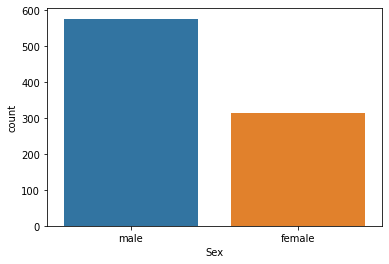

In [12]:
sns.countplot('Sex',data=dataset)
dataset['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


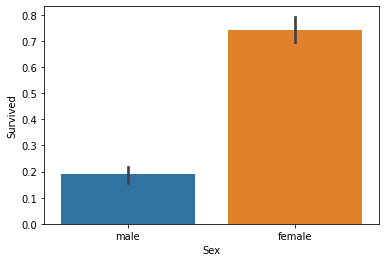

In [13]:
sns.barplot(x='Sex',y='Survived',data=dataset)
dataset.groupby('Sex',as_index=False).Survived.mean()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    491
1    216
2    184
Name: Pclass, dtype: int64

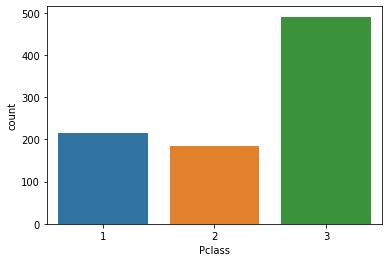

In [14]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


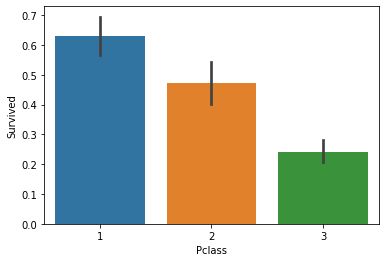

In [15]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    537
0    354
Name: TravelAlone, dtype: int64

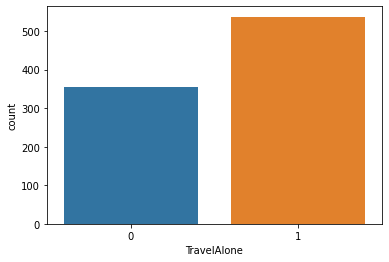

In [16]:
sns.countplot('TravelAlone',data=dataset)
dataset['TravelAlone'].value_counts()

,TravelAlone,Survived
0,0,0.505650
1,1,0.303538


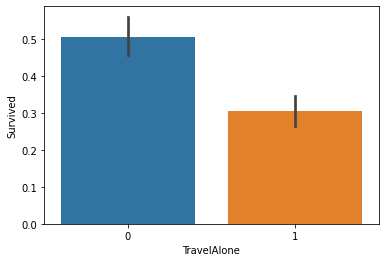

In [17]:
sns.barplot(x='TravelAlone',y='Survived',data=dataset)
dataset.groupby('TravelAlone',as_index=False).Survived.mean()

The Median age of passengers is: 28


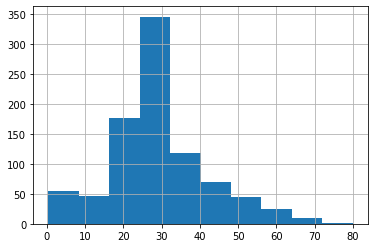

In [18]:
dataset.Age.hist()
print("The Median age of passengers is:", int(dataset.Age.median()))

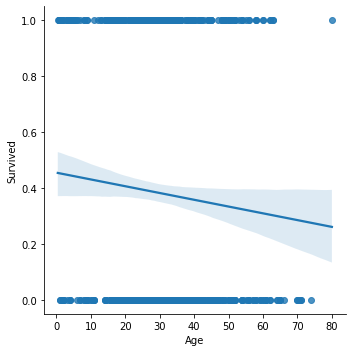

In [19]:
sns.lmplot(x='Age',y='Survived',data=dataset)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    549
1    342
Name: Survived, dtype: int64

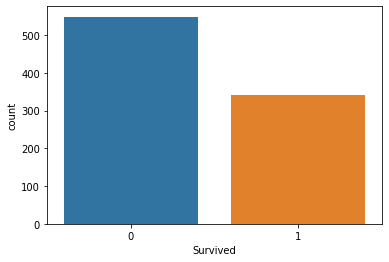

In [20]:
sns.countplot('Survived',data=dataset)
dataset['Survived'].value_counts()

In [21]:
dataset.corr()

,Survived,Pclass,Age,Fare,TravelAlone
Survived,1.000000,-0.338481,-0.064910,0.257307,-0.203367
Pclass,-0.338481,1.000000,-0.339898,-0.549500,0.135207
Age,-0.064910,-0.339898,1.000000,0.096688,0.171647
Fare,0.257307,-0.549500,0.096688,1.000000,-0.271832
TravelAlone,-0.203367,0.135207,0.171647,-0.271832,1.000000


In [22]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']=label_encoder.fit_transform(dataset['Embarked'])

In [23]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


In [24]:
X = dataset.drop('Survived', 1)
y = dataset.Survived

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_16164/2419027415.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop('Survived', 1)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = lr_model.predict(X_test)

y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [28]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
707,1,0
37,0,0
615,1,1
169,0,0
68,1,1


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.80      0.66      0.72        79

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



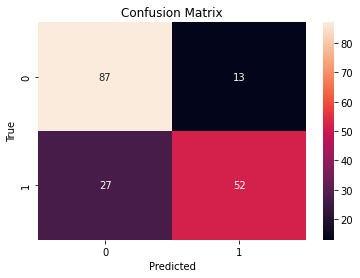

In [29]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.776536312849162
